# BB84 Quantum Key Distribution Simulation

This code simulates the **BB84 quantum key distribution protocol**, which allows two parties, Alice and Bob, to establish a **shared secret key** using quantum mechanics.

## **1. Generating Qubits (Alice's Preparation)**
- Alice randomly chooses a basis (`X` or `Z`) for each qubit.
- She also randomly decides whether to encode a `0` or `1` in each qubit.
- If encoding `1`, she applies an `X` (bit-flip) gate.
- If using the `X` basis, she applies a Hadamard (`H`) gate to switch to the `X` basis.
- The qubits are stored in a list.

## **2. Measuring Qubits (Bob's Measurement)**
- Bob randomly chooses bases (`X` or `Z`) to measure the qubits.
- If he chooses `X`, he applies a Hadamard gate to transform back to the computational basis.
- He measures the qubit and stores the result.

## **3. Sifting the Key**
- Alice and Bob **compare bases** (without revealing their actual qubit values).
- Only the bits where they used the **same basis** are kept for the final **shared secret key**.

## **4. Running the Simulation**
- The code generates **10 qubits**, simulates Alice's encoding and Bob's measurement, and prints the **final shared key**.

This key can later be used for secure communication, as any eavesdropping would introduce detectable errors. 🚀


In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

def generate_qubits(n):
    """Simulate Alice preparing qubits in random bases."""
    # Randomly choose bases ('X' for Hadamard, 'Z' for standard basis) for each qubit
    bases = np.random.choice(['X', 'Z'], size=n)
    # Generate random classical bits (0 or 1) for encoding
    bits = np.random.randint(0, 2, size=n)
    qubits = []
    
    for i in range(n):
        qc = QuantumCircuit(1, 1)  # Create a single-qubit quantum circuit
        
        # Encode the bit: If bit is 1, apply an X (NOT) gate
        if bits[i] == 1:
            qc.x(0)
        
        # Apply Hadamard if the chosen basis is 'X' (superposition basis)
        if bases[i] == 'X':
            qc.h(0)
        
        qubits.append(qc)  # Store the prepared qubit circuit
    
    return qubits, bases, bits

def measure_qubits(qubits, bases):
    """Simulate Bob measuring qubits in random bases."""
    measured_bits = []  # Store measurement results
    simulator = AerSimulator()  # Initialize the quantum simulator
    
    for i in range(len(qubits)):
        qc = qubits[i].copy()  # Copy the quantum circuit to avoid modifying the original
        
        # Apply Hadamard if Bob's chosen basis is 'X' (to match Alice's 'X' basis)
        if bases[i] == 'X':
            qc.h(0)
        
        qc.measure(0, 0)  # Measure the qubit in the chosen basis
        
        # Simulate the measurement and retrieve the result
        result = simulator.run(qc, shots=1, memory=True).result()
        measured_bits.append(int(result.get_memory()[0]))  # Extract the bit result
    
    return measured_bits

def sift_keys(alice_bases, bob_bases, alice_bits, bob_bits):
    """Sift out the key by keeping only matching bases."""
    key = [alice_bits[i] for i in range(len(alice_bases)) if alice_bases[i] == bob_bases[i]]
    return key

# Simulate BB84 protocol
num_qubits = 10  # Number of qubits to be exchanged

# Step 1: Alice prepares qubits in random bases and encodes random bits
alice_qubits, alice_bases, alice_bits = generate_qubits(num_qubits)

# Step 2: Bob randomly chooses bases for measurement
bob_bases = np.random.choice(['X', 'Z'], size=num_qubits)

# Step 3: Bob measures the qubits in his chosen bases
bob_bits = measure_qubits(alice_qubits, bob_bases)

# Step 4: Alice and Bob publicly compare their bases and keep matching ones
secure_key = sift_keys(alice_bases, bob_bases, alice_bits, bob_bits)

# Step 5: Print the final shared key
print("Final Shared Key:", secure_key)


Final Shared Key: [1, 0, 1, 0, 1, 0]


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

def generate_qubits(n):
    """Simulate Alice preparing qubits in random bases."""
    # Randomly choose bases ('X' for Hadamard, 'Z' for standard basis) for each qubit
    bases = np.random.choice(['X', 'Z'], size=n)
    # Generate random classical bits (0 or 1) for encoding
    bits = np.random.randint(0, 2, size=n)
    qubits = []
    
    for i in range(n):
        qc = QuantumCircuit(1, 1)  # Create a single-qubit quantum circuit
        
        # Encode the bit: If bit is 1, apply an X (NOT) gate
        if bits[i] == 1:
            qc.x(0)
        
        # Apply Hadamard if the chosen basis is 'X' (superposition basis)
        if bases[i] == 'X':
            qc.h(0)
        
        qubits.append((qc, bases[i], bits[i]))  # Store the prepared qubit circuit along with its basis and bit
    
    return qubits

def measure_qubits(qubits, bases):
    """Simulate Bob measuring qubits in random bases."""
    measured_bits = []  # Store measurement results
    simulator = AerSimulator()  # Initialize the quantum simulator
    
    for i in range(len(qubits)):
        qc, alice_basis, alice_bit = qubits[i]
        
        # Bob chooses his measurement basis
        bob_basis = bases[i]
        
        # Apply Hadamard if Bob's chosen basis is 'X' (to match Alice's 'X' basis)
        if bob_basis == 'X':
            qc.h(0)
        
        qc.measure(0, 0)  # Measure the qubit in the chosen basis
        
        # Simulate the measurement and retrieve the result
        result = simulator.run(qc, shots=1, memory=True).result()
        measured_bits.append(int(result.get_memory()[0]))  # Extract the bit result
    
    return measured_bits

def sift_keys(alice_bases, bob_bases, alice_bits, bob_bits):
    """Sift out the key by keeping only matching bases."""
    key = [alice_bits[i] for i in range(len(alice_bases)) if alice_bases[i] == bob_bases[i]]
    return key

def simulate_eavesdropper(qubits, bases, eavesdrop=False):
    """Simulate an eavesdropper (Eve) who intercepts and measures qubits."""
    if not eavesdrop:
        return None  # No interception
    
    eavesdropped_bits = []  # Store Eve's measurements
    simulator = AerSimulator()
    
    for i in range(len(qubits)):
        qc, alice_basis, alice_bit = qubits[i]
        
        # Eve randomly chooses a basis to measure
        eve_basis = np.random.choice(['X', 'Z'])
        
        # Apply Hadamard if Eve's basis is 'X'
        if eve_basis == 'X':
            qc.h(0)
        
        qc.measure(0, 0)  # Measure the qubit in Eve's basis
        
        # Simulate the measurement and retrieve the result
        result = simulator.run(qc, shots=1, memory=True).result()
        eavesdropped_bits.append(int(result.get_memory()[0]))  # Extract the bit result
    
    return eavesdropped_bits

# Simulate BB84 protocol
num_qubits = 10  # Number of qubits to be exchanged

# Step 1: Alice prepares qubits in random bases and encodes random bits
alice_qubits = generate_qubits(num_qubits)

# Step 2: Bob randomly chooses bases for measurement
bob_bases = np.random.choice(['X', 'Z'], size=num_qubits)

# Step 3: Simulate an eavesdropper intercepting the qubits (optional)
eavesdrop = True  # Change this to False to simulate without Eve
eavesdropped_bits = simulate_eavesdropper(alice_qubits, bob_bases, eavesdrop)

# Step 4: Bob measures the qubits in his chosen bases
bob_bits = measure_qubits(alice_qubits, bob_bases)

# Step 5: Alice and Bob publicly compare their bases and keep matching ones
alice_bases = [q[1] for q in alice_qubits]
alice_bits = [q[2] for q in alice_qubits]
secure_key = sift_keys(alice_bases, bob_bases, alice_bits, bob_bits)

# Step 6: Print the final shared key
print("Alice's Bases:", alice_bases)
print("Bob's Bases:", bob_bases)
print("Alice's Bits:", alice_bits)
print("Bob's Bits:", bob_bits)
print("Final Shared Key:", secure_key)

# Step 7: Show if any eavesdropping occurred
if eavesdrop:
    print("Eve's Intercepted Bits:", eavesdropped_bits)


Alice's Bases: ['Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'X']
Bob's Bases: ['Z' 'X' 'X' 'X' 'Z' 'Z' 'X' 'Z' 'X' 'X']
Alice's Bits: [1, 0, 1, 0, 0, 1, 1, 0, 1, 1]
Bob's Bits: [1, 1, 0, 0, 0, 0, 1, 0, 0, 0]
Final Shared Key: [1, 0, 1, 1]
Eve's Intercepted Bits: [1, 0, 0, 1, 0, 0, 1, 0, 1, 1]


### adding visualizations

Alice's Bases: ['X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'Z']
Bob's Bases: ['Z' 'Z' 'X' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z' 'Z']
Alice's Bits: [0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
Bob's Bits: [1, 1, 0, 1, 0, 0, 0, 1, 1, 0]
Final Shared Key: [1, 1, 1, 1, 1, 0, 0]
Eve's Intercepted Bits: [1, 1, 0, 1, 0, 0, 1, 1, 1, 0]
Quantum State for qubit 1 in X basis (initially 0):
Quantum State for qubit 2 in Z basis (initially 1):


/var/folders/f5/vylvqwgn7m93h92p1slfbtvw0000gn/T/ipykernel_12685/1099326661.py:92: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  visual_qc.data = [inst for inst in visual_qc.data if inst[0].name != 'measure']


Quantum State for qubit 3 in X basis (initially 1):
Quantum State for qubit 4 in Z basis (initially 1):
Quantum State for qubit 5 in Z basis (initially 1):
Quantum State for qubit 6 in X basis (initially 0):
Quantum State for qubit 7 in X basis (initially 1):
Quantum State for qubit 8 in Z basis (initially 1):
Quantum State for qubit 9 in Z basis (initially 0):
Quantum State for qubit 10 in Z basis (initially 0):


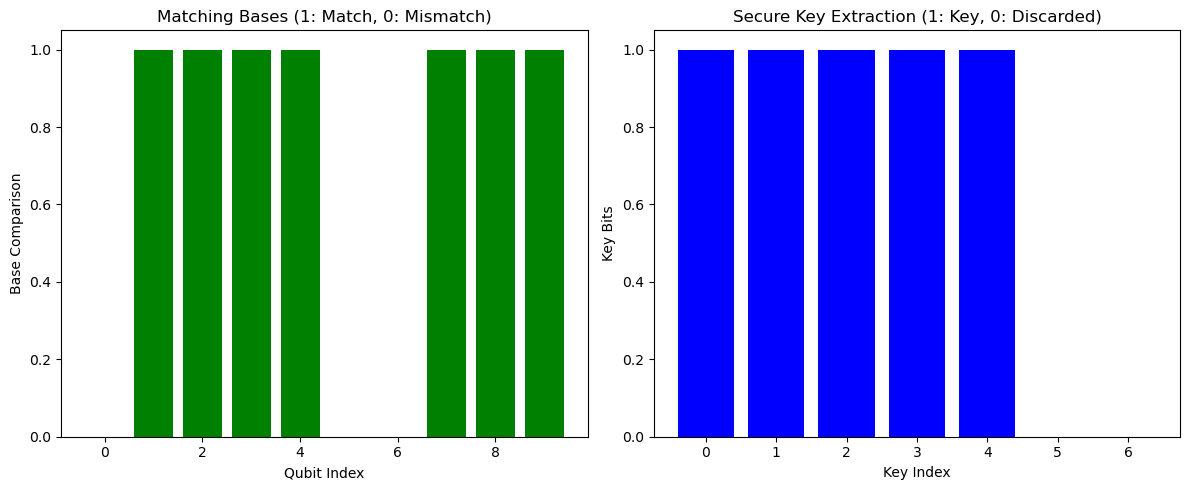

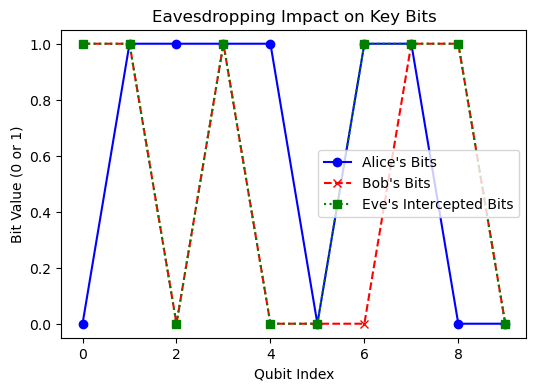

In [6]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram, plot_state_qsphere

def generate_qubits(n):
    """Simulate Alice preparing qubits in random bases."""
    bases = np.random.choice(['X', 'Z'], size=n)
    bits = np.random.randint(0, 2, size=n)
    qubits = []
    
    for i in range(n):
        qc = QuantumCircuit(1, 1)  # Create a single-qubit quantum circuit
        
        # Encode the bit: If bit is 1, apply an X (NOT) gate
        if bits[i] == 1:
            qc.x(0)
        
        # Apply Hadamard if the chosen basis is 'X' (superposition basis)
        if bases[i] == 'X':
            qc.h(0)
        
        qubits.append((qc, bases[i], bits[i]))  # Store the prepared qubit circuit along with its basis and bit
    
    return qubits

def measure_qubits(qubits, bases):
    """Simulate Bob measuring qubits in random bases."""
    measured_bits = []  
    simulator = AerSimulator()  
    
    for i in range(len(qubits)):
        qc, alice_basis, alice_bit = qubits[i]
        
        # Bob chooses his measurement basis
        bob_basis = bases[i]
        
        # Apply Hadamard if Bob's chosen basis is 'X' (to match Alice's 'X' basis)
        if bob_basis == 'X':
            qc.h(0)
        
        qc.measure(0, 0)  
        
        result = simulator.run(qc, shots=1, memory=True).result()
        measured_bits.append(int(result.get_memory()[0]))  
    
    return measured_bits

def sift_keys(alice_bases, bob_bases, alice_bits, bob_bits):
    """Sift out the key by keeping only matching bases."""
    key = [alice_bits[i] for i in range(len(alice_bases)) if alice_bases[i] == bob_bases[i]]
    return key

def simulate_eavesdropper(qubits, bases, eavesdrop=False):
    """Simulate an eavesdropper (Eve) who intercepts and measures qubits."""
    if not eavesdrop:
        return None  
    
    eavesdropped_bits = []  
    simulator = AerSimulator()
    
    for i in range(len(qubits)):
        qc, alice_basis, alice_bit = qubits[i]
        
        # Eve randomly chooses a basis to measure
        eve_basis = np.random.choice(['X', 'Z'])
        
        if eve_basis == 'X':
            qc.h(0)
        
        qc.measure(0, 0)  
        
        result = simulator.run(qc, shots=1, memory=True).result()
        eavesdropped_bits.append(int(result.get_memory()[0]))  
    
    return eavesdropped_bits


def plot_quantum_states(qubits):
    """Visualize quantum states using Qsphere before measurement."""
    for i, (qc, basis, bit) in enumerate(qubits):
        # Create a fresh quantum circuit for visualization (no classical bits)
        visual_qc = qc.copy()  # Copy the quantum circuit to avoid modifying the original
        
        # Apply Hadamard if the qubit is in the X-basis
        if basis == 'X':
            visual_qc.h(0)

        # Remove any classical measurements from the circuit for visualization
        # Access operations directly without treating CircuitInstruction as iterable
        visual_qc.data = [inst for inst in visual_qc.data if inst[0].name != 'measure']

        # Print the quantum state for visualization
        print(f"Quantum State for qubit {i+1} in {basis} basis (initially {bit}):")
        plot_state_qsphere(visual_qc)  # Visualize the quantum state


def plot_key_comparison(alice_bases, bob_bases, secure_key):
    """Visualize the comparison of Alice's and Bob's bases and the secure key."""
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    ax[0].bar(range(len(alice_bases)), np.array(alice_bases) == np.array(bob_bases), color='green')
    ax[0].set_title("Matching Bases (1: Match, 0: Mismatch)")
    ax[0].set_ylabel("Base Comparison")
    ax[0].set_xlabel("Qubit Index")
    
    ax[1].bar(range(len(secure_key)), secure_key, color='blue')
    ax[1].set_title("Secure Key Extraction (1: Key, 0: Discarded)")
    ax[1].set_ylabel("Key Bits")
    ax[1].set_xlabel("Key Index")
    
    plt.tight_layout()
    plt.show()

def plot_eavesdropping(alice_bits, bob_bits, eavesdropped_bits):
    """Visualize the effect of eavesdropping on the key extraction process."""
    plt.figure(figsize=(6, 4))
    plt.plot(alice_bits, label="Alice's Bits", marker='o', linestyle='-', color='blue')
    plt.plot(bob_bits, label="Bob's Bits", marker='x', linestyle='--', color='red')
    plt.plot(eavesdropped_bits, label="Eve's Intercepted Bits", marker='s', linestyle=':', color='green')
    plt.legend()
    plt.title("Eavesdropping Impact on Key Bits")
    plt.xlabel("Qubit Index")
    plt.ylabel("Bit Value (0 or 1)")
    plt.show()

# Simulate BB84 protocol
num_qubits = 10  # Number of qubits to be exchanged

# Step 1: Alice prepares qubits in random bases and encodes random bits
alice_qubits = generate_qubits(num_qubits)

# Step 2: Bob randomly chooses bases for measurement
bob_bases = np.random.choice(['X', 'Z'], size=num_qubits)

# Step 3: Simulate an eavesdropper intercepting the qubits (optional)
eavesdrop = True  
eavesdropped_bits = simulate_eavesdropper(alice_qubits, bob_bases, eavesdrop)

# Step 4: Bob measures the qubits in his chosen bases
bob_bits = measure_qubits(alice_qubits, bob_bases)

# Step 5: Alice and Bob publicly compare their bases and keep matching ones
alice_bases = [q[1] for q in alice_qubits]
alice_bits = [q[2] for q in alice_qubits]
secure_key = sift_keys(alice_bases, bob_bases, alice_bits, bob_bits)

# Step 6: Print the final shared key
print("Alice's Bases:", alice_bases)
print("Bob's Bases:", bob_bases)
print("Alice's Bits:", alice_bits)
print("Bob's Bits:", bob_bits)
print("Final Shared Key:", secure_key)

# Step 7: Show if any eavesdropping occurred
if eavesdrop:
    print("Eve's Intercepted Bits:", eavesdropped_bits)

# Visualize quantum states of the qubits prepared by Alice
plot_quantum_states(alice_qubits)

# Visualize key comparison (Alice's vs Bob's bases, and key extraction)
plot_key_comparison(alice_bases, bob_bases, secure_key)

# Visualize the effect of eavesdropping
if eavesdrop:
    plot_eavesdropping(alice_bits, bob_bits, eavesdropped_bits)
